In [35]:
import pandas as pd 
import glob 
import re
from functools import reduce 

from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer

from collections import Counter 

import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS 

In [36]:
import nltk 

In [37]:
all_files = glob.glob("/Users/pc/test/myCabinet/my*.xls")
all_files

['/Users/pc/test/myCabinet\\myCabinetExcelData (1).xls',
 '/Users/pc/test/myCabinet\\myCabinetExcelData (2).xls',
 '/Users/pc/test/myCabinet\\myCabinetExcelData (3).xls',
 '/Users/pc/test/myCabinet\\myCabinetExcelData (4).xls',
 '/Users/pc/test/myCabinet\\myCabinetExcelData (5).xls',
 '/Users/pc/test/myCabinet\\myCabinetExcelData (6).xls',
 '/Users/pc/test/myCabinet\\myCabinetExcelData (7).xls',
 '/Users/pc/test/myCabinet\\myCabinetExcelData (8).xls',
 '/Users/pc/test/myCabinet\\myCabinetExcelData (9).xls',
 '/Users/pc/test/myCabinet\\myCabinetExcelData.xls']

In [38]:
all_files_data = []

In [39]:
for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)
print(len(all_files_data))

10


In [40]:
print(all_files_data)

[    Unnamed: 0   번호                                                 제목   저자  \
0          NaN    1  JAVA APPLET을 이용한 전력전자공학의 활용 방안 = (A)Study on P...  최원경   
1          NaN    2  Java 어플리케이션의 개발을 지원하는 문서와 코드 생성 도구 = Document ...  장근실   
2          NaN    3  내장형 자바 시스템을 위한 롬이미지 제작 기법 = (A) ROM Image Maki...  강두진   
3          NaN    4  임베디드 시스템을 위한 자바 바이트코드에서 .NET MSIL 코드로의 번역기 = T...  정지훈   
4          NaN    5  자바 병렬 컴퓨팅 환경을 위한 MPI 일대일 통신 패키지의 설계 및 구현 = Des...  진은경   
..         ...  ...                                                ...  ...   
95         NaN   96          JAVA를 이용한 병렬 프로그램 수행의 이해를 지원하는 시각화 도구의 개발  이문형   
96         NaN   97  JAVA를 이용한 웹 서비스 기반의 이질 분산 테이터베이스 접근 모델 = Acces...  박미영   
97         NaN   98  Java를 이용한 WML과 mHTML 인터프리터의 설계 및 구현 = Designan...  김성수   
98         NaN   99  Java를 기반으로 한 DBMS 테스트시스템의 설계 및 구현 = Design and...  이건희   
99         NaN  100  Java/RTI 테스트 스위트 개발 = Development of Java/RTI ...  이정욱   

                출판사   출판일 학위논문사항  
0         고려대학교

In [41]:
all_files_data_concat = pd.concat(all_files_data, axis = 0, ignore_index=True)
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일,학위논문사항
0,NaN,1,JAVA APPLET을 이용한 전력전자공학의 활용 방안 = (A)Study on P...,최원경,고려대학교 대학원,2005,국내석사
1,NaN,2,Java 어플리케이션의 개발을 지원하는 문서와 코드 생성 도구 = Document ...,장근실,全北大學校,2004,국내박사
2,NaN,3,내장형 자바 시스템을 위한 롬이미지 제작 기법 = (A) ROM Image Maki...,강두진,연세대학교 대학원,2000,국내석사
3,NaN,4,임베디드 시스템을 위한 자바 바이트코드에서 .NET MSIL 코드로의 번역기 = T...,정지훈,서경대학교 대학원,2003,국내석사
4,NaN,5,자바 병렬 컴퓨팅 환경을 위한 MPI 일대일 통신 패키지의 설계 및 구현 = Des...,진은경,이화여자대학교,2000,국내석사
...,...,...,...,...,...,...,...
995,NaN,96,JAVA를 이용한 병렬 프로그램 수행의 이해를 지원하는 시각화 도구의 개발,이문형,광운대학교 전산대학원,1997,국내석사
996,NaN,97,JAVA를 이용한 웹 서비스 기반의 이질 분산 테이터베이스 접근 모델 = Acces...,박미영,湖南大學校 大學院,2006,국내석사
997,NaN,98,Java를 이용한 WML과 mHTML 인터프리터의 설계 및 구현 = Designan...,김성수,동국대학교 산업기술환경대학원,2000,국내석사
998,NaN,99,Java를 기반으로 한 DBMS 테스트시스템의 설계 및 구현 = Design and...,이건희,경성대학교 대학원,2000,국내석사


In [42]:
all_files_data_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   번호          1000 non-null   int64  
 2   제목          1000 non-null   object 
 3   저자          1000 non-null   object 
 4   출판사         998 non-null    object 
 5   출판일         1000 non-null   int64  
 6   학위논문사항      1000 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [43]:
all_files_data_concat.to_csv("/Users/pc/test/myCabinet/collect_files.csv", encoding = "utf8", index=False)

In [44]:
read_file = pd.read_csv("/Users/pc/test/myCabinet/collect_files.csv", encoding = "utf8")

In [45]:
read_file.head()

,Unnamed: 0,번호,제목,저자,출판사,출판일,학위논문사항
0,NaN,1,JAVA APPLET을 이용한 전력전자공학의 활용 방안 = (A)Study on P...,최원경,고려대학교 대학원,2005,국내석사
1,NaN,2,Java 어플리케이션의 개발을 지원하는 문서와 코드 생성 도구 = Document ...,장근실,全北大學校,2004,국내박사
2,NaN,3,내장형 자바 시스템을 위한 롬이미지 제작 기법 = (A) ROM Image Maki...,강두진,연세대학교 대학원,2000,국내석사
3,NaN,4,임베디드 시스템을 위한 자바 바이트코드에서 .NET MSIL 코드로의 번역기 = T...,정지훈,서경대학교 대학원,2003,국내석사
4,NaN,5,자바 병렬 컴퓨팅 환경을 위한 MPI 일대일 통신 패키지의 설계 및 구현 = Des...,진은경,이화여자대학교,2000,국내석사


In [46]:
all_titles = read_file['제목']
all_titles.head()

0    JAVA APPLET을 이용한 전력전자공학의 활용 방안 = (A)Study on P...
1    Java 어플리케이션의 개발을 지원하는 문서와 코드 생성 도구 = Document ...
2    내장형 자바 시스템을 위한 롬이미지 제작 기법 = (A) ROM Image Maki...
3    임베디드 시스템을 위한 자바 바이트코드에서 .NET MSIL 코드로의 번역기 = T...
4    자바 병렬 컴퓨팅 환경을 위한 MPI 일대일 통신 패키지의 설계 및 구현 = Des...
Name: 제목, dtype: object

In [47]:
stopwords = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

In [48]:
words =[]
#nltk.download('stopwords')

In [49]:
for title in all_titles: 

    EnWords = re.sub(r"[^a-zA-Z]+"," ", str(title))
    EnWords = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWords if w not in stopwords]#익명함수 
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]

    words.append(EnWordsTokenStopLemma)

In [50]:
words

[['java',
  'applet',
  'study',
  'power',
  'electronics',
  'based',
  'java',
  'applet'],
 ['java',
  'document',
  'code',
  'generation',
  'tool',
  'supporting',
  'development',
  'java',
  'application'],
 ['rom', 'image', 'making', 'mechanism', 'embedded', 'java', 'system'],
 ['net',
  'msil',
  'translator',
  'java',
  'bytecode',
  'net',
  'msil',
  'code',
  'embedded',
  'system'],
 ['mpi',
  'design',
  'implementation',
  'java',
  'mpi',
  'point',
  'point',
  'communication',
  'java',
  'parallel',
  'comupting',
  'environment'],
 ['api',
  'design',
  'implementation',
  'profile',
  'low',
  'power',
  'java',
  'api',
  'embedded',
  'java'],
 ['java',
  'api',
  'development',
  'non',
  'immersive',
  'virtual',
  'reality',
  'system',
  'using',
  'java',
  'api'],
 ['java',
  'core',
  'api',
  'design',
  'quality',
  'measurement',
  'supporting',
  'tool',
  'java',
  'core',
  'api'],
 ['enhanced', 'java', 'card', 'system', 'fast', 'execution', 'app

In [51]:
#논문에 java를 검색했을 때 가장 많이 나오는 단어 수들 
words2 = reduce(lambda x, y: x+y, words)
print(type(words2))
words2[:10]

<class 'list'>


['java',
 'applet',
 'study',
 'power',
 'electronics',
 'based',
 'java',
 'applet',
 'java',
 'document']

In [52]:
count = Counter(words2)
count

Counter({'java': 738,
         'applet': 30,
         'study': 97,
         'power': 15,
         'electronics': 2,
         'based': 170,
         'document': 2,
         'code': 39,
         'generation': 13,
         'tool': 18,
         'supporting': 12,
         'development': 85,
         'application': 45,
         'rom': 2,
         'image': 7,
         'making': 8,
         'mechanism': 5,
         'embedded': 39,
         'system': 161,
         'net': 8,
         'msil': 8,
         'translator': 8,
         'bytecode': 11,
         'mpi': 8,
         'design': 132,
         'implementation': 146,
         'point': 7,
         'communication': 4,
         'parallel': 14,
         'comupting': 2,
         'environment': 41,
         'api': 31,
         'profile': 5,
         'low': 5,
         'non': 9,
         'immersive': 2,
         'virtual': 52,
         'reality': 3,
         'using': 144,
         'core': 6,
         'quality': 3,
         'measurement': 4,
         '

In [53]:
word_count = dict() #일정 빈도수 이상만을 담는 딕셔너리 

In [54]:
count.most_common(20)

[('java', 738),
 ('based', 170),
 ('system', 161),
 ('implementation', 146),
 ('using', 144),
 ('design', 132),
 ('study', 97),
 ('indonesia', 93),
 ('web', 86),
 ('development', 85),
 ('analysis', 56),
 ('virtual', 52),
 ('program', 48),
 ('application', 45),
 ('object', 42),
 ('environment', 41),
 ('west', 41),
 ('machine', 40),
 ('code', 39),
 ('embedded', 39)]

In [56]:
for tag, counts in count.most_common(20):
    if (len(str(tag))>1):
        word_count[tag] = counts
print(word_count)

{'java': 738, 'based': 170, 'system': 161, 'implementation': 146, 'using': 144, 'design': 132, 'study': 97, 'indonesia': 93, 'web': 86, 'development': 85, 'analysis': 56, 'virtual': 52, 'program': 48, 'application': 45, 'object': 42, 'environment': 41, 'west': 41, 'machine': 40, 'code': 39, 'embedded': 39}


In [57]:
#검색값과 일치하는 부분은 삭제 
del word_count['java']

In [58]:
print(word_count)

{'based': 170, 'system': 161, 'implementation': 146, 'using': 144, 'design': 132, 'study': 97, 'indonesia': 93, 'web': 86, 'development': 85, 'analysis': 56, 'virtual': 52, 'program': 48, 'application': 45, 'object': 42, 'environment': 41, 'west': 41, 'machine': 40, 'code': 39, 'embedded': 39}


In [66]:
key_list = list(word_count.keys())
key_list2 = key_list[:10]

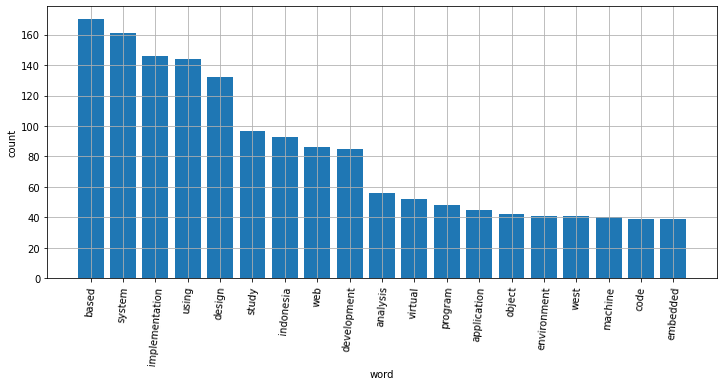

In [68]:
plt.figure(figsize=(12,5))
plt.xlabel('word')
plt.ylabel('count')
plt.grid(True)

plt.bar(range(len(word_count)), word_count.values())
plt.xticks(range(len(word_count)), word_count.keys(), rotation = '85')
plt.show()